<a href="https://colab.research.google.com/github/FIU-SCIS-Senior-Projects/Collaborative-Platform/blob/master/Lab1_Foundations_of_NLP_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Adrian Alfonso**

# Lab 1: Foundations of NLP

In this lab you will **choose one** API to fetch approximately 200 words of live text, then use that text for all tasks below.

**TODO:** Pick your API from the list (see README/API docs), and implement the fetch in the first code cell.

In [103]:
#dependencies
import requests
import spacy
from collections import Counter
import matplotlib.pyplot as plt


In [104]:
# Fetch ~200 words of text from your chosen API


resp = requests.get("https://en.wikipedia.org/api/rest_v1/page/summary/Miami").json()
raw_text = resp["extract"]

print("===========")
print("Fetched text length:",  len(raw_text))
print("")
print("Below is a preview of the extracted text: ")
print("")
print(raw_text)

Fetched text length: 548

Below is a preview of the extracted text: 

Miami is a coastal city in the U.S. state of Florida and the county seat of Miami-Dade County in South Florida. It is the core of the Miami metropolitan area, which, with a population of 6.14 million, is the second-largest metropolitan area in the Southeast after Atlanta, and the ninth-largest in the United States. With a population of 442,241 as of the 2020 census, Miami is the second-most populous city in Florida, after Jacksonville. Miami has the third-largest skyline in the U.S. with over 300 high-rises, 70 of which exceed 491 ft (150 m).


## 1. Text Preprocessing (30 pts)

- Use the `raw_text` variable you fetched.
- Tokenize, lowercase, remove punctuation.
- Remove stopwords.
- Plot the top-10 most frequent tokens.

**TODO:** Write your code below and commit after each sub-step.

In [105]:
#load the spacy model
nlp = spacy.load("en_core_web_sm")

#set the raw_text to lower case first. I did this here because I don't want to loose the token objects further donw.
raw_text = raw_text.lower()

#load the raw text into a spacy Doc object
doc = nlp(raw_text)

#get the original tokens
original_tokens = [token.text for token in doc]


In [106]:
# Tokenize and clean raw_text
# Note, I'm trything to preserve the list as a token list just to preserve the Token type
tokens_lower_without_punctuation = [token for token in doc if not token.is_punct]

print("Original tokens:\t\t\t", original_tokens)
print("Lower case and no puntuation tokens:\t",tokens_lower_without_punctuation)


Original tokens:			 ['miami', 'is', 'a', 'coastal', 'city', 'in', 'the', 'u.s', '.', 'state', 'of', 'florida', 'and', 'the', 'county', 'seat', 'of', 'miami', '-', 'dade', 'county', 'in', 'south', 'florida', '.', 'it', 'is', 'the', 'core', 'of', 'the', 'miami', 'metropolitan', 'area', ',', 'which', ',', 'with', 'a', 'population', 'of', '6.14', '\xa0', 'million', ',', 'is', 'the', 'second', '-', 'largest', 'metropolitan', 'area', 'in', 'the', 'southeast', 'after', 'atlanta', ',', 'and', 'the', 'ninth', '-', 'largest', 'in', 'the', 'united', 'states', '.', 'with', 'a', 'population', 'of', '442,241', 'as', 'of', 'the', '2020', 'census', ',', 'miami', 'is', 'the', 'second', '-', 'most', 'populous', 'city', 'in', 'florida', ',', 'after', 'jacksonville', '.', 'miami', 'has', 'the', 'third', '-', 'largest', 'skyline', 'in', 'the', 'u.s', '.', 'with', 'over', '300', 'high', '-', 'rises', ',', '70', 'of', 'which', 'exceed', '491', '\xa0', 'ft', '(', '150', '\xa0', 'm', ')', '.']
Lower case and n

In [107]:
#Remove stopwords (articles, preposstions, conjunctions, pronouns)
#Note: this could have been done in the previous step.
cleaned_tokens = [token for token in tokens_lower_without_punctuation if not token.is_stop]
print("Original tokens:\t\t\t\t", original_tokens)
print("Lower case and no puntuation and not stop words:",cleaned_tokens) #Note: notice how words is, a, in are not present anymore.


Original tokens:				 ['miami', 'is', 'a', 'coastal', 'city', 'in', 'the', 'u.s', '.', 'state', 'of', 'florida', 'and', 'the', 'county', 'seat', 'of', 'miami', '-', 'dade', 'county', 'in', 'south', 'florida', '.', 'it', 'is', 'the', 'core', 'of', 'the', 'miami', 'metropolitan', 'area', ',', 'which', ',', 'with', 'a', 'population', 'of', '6.14', '\xa0', 'million', ',', 'is', 'the', 'second', '-', 'largest', 'metropolitan', 'area', 'in', 'the', 'southeast', 'after', 'atlanta', ',', 'and', 'the', 'ninth', '-', 'largest', 'in', 'the', 'united', 'states', '.', 'with', 'a', 'population', 'of', '442,241', 'as', 'of', 'the', '2020', 'census', ',', 'miami', 'is', 'the', 'second', '-', 'most', 'populous', 'city', 'in', 'florida', ',', 'after', 'jacksonville', '.', 'miami', 'has', 'the', 'third', '-', 'largest', 'skyline', 'in', 'the', 'u.s', '.', 'with', 'over', '300', 'high', '-', 'rises', ',', '70', 'of', 'which', 'exceed', '491', '\xa0', 'ft', '(', '150', '\xa0', 'm', ')', '.']
Lower case and 

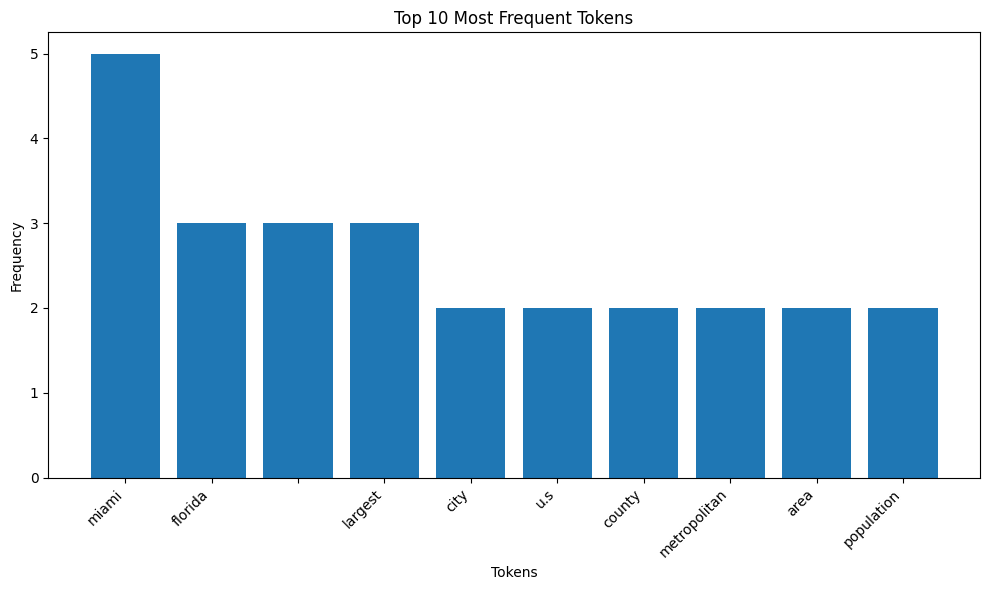

In [108]:
# Plot frequent tokens

#compute the token count
token_counts = Counter([token.text for token in cleaned_tokens])

top_10_tokens = token_counts.most_common(10)

tokens = [token for token, count in top_10_tokens]
counts = [count for token, count in top_10_tokens]

# Plot the top 10 tokens
plt.figure(figsize=(10, 6))
plt.bar(tokens,counts)
plt.xlabel("Tokens")
plt.ylabel("Frequency")
plt.title("Top 10 Most Frequent Tokens")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

#Please note that the token '\xa0' prints in blank in the chart
#print(top_10_tokens)

## 2. Synonym Generation (30 pts)

- Pick 5 tokens from your preprocessed results.
- Manually list 2-3 synonyms each.
- Use Google AI Studio Text API to generate synonyms for each.

**TODO:** Complete the code and reflections.

In [109]:
# TODO: Manually list synonyms


In [110]:
# TODO: Call Google AI Studio Text API for synonyms


## 3. Part-of-Speech Annotation (20 pts)

- Select one sentence from `raw_text`.
- Manually tag each word with its POS.
- Call the AI Studio syntax endpoint and compare.

**TODO:** Implement tagging and comparison.

In [111]:
# TODO: Manual POS tagging


In [112]:
# TODO: Call AI Studio syntax endpoint


## 4. Thinking & Reflection (20 pts)

Answer in Markdown:
1. Which preprocessing step had the biggest impact?
2. What surprised you about the AI outputs?
3. How would you integrate manual rules and AI calls in a production pipeline?